In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report

In [ ]:
# Load dataset
data = pd.read_csv('loan_data.csv')

In [ ]:

# Encode categorical variables
categorical_cols = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Split data into features and target
X = data.drop(columns=['loan_status'])
y = data['loan_status']

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation for Logistic Regression
y_train_pred_log = log_model.predict(X_train)
y_test_pred_log = log_model.predict(X_test)


In [ ]:
# Metrics for Logistic Regression
print("Logistic Regression Metrics")
print("Training Metrics:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_log):.2f}")
print(f"Precision: {precision_score(y_train, y_train_pred_log):.2f}")
print(f"Recall: {recall_score(y_train, y_train_pred_log):.2f}")
print(f"F1-Score: {f1_score(y_train, y_train_pred_log):.2f}")
print("\nClassification Report (Training):")
print(classification_report(y_train, y_train_pred_log))

print("Testing Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_log):.2f}")
print(f"Precision: {precision_score(y_test, y_test_pred_log):.2f}")
print(f"Recall: {recall_score(y_test, y_test_pred_log):.2f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_log):.2f}")
print("\nClassification Report (Testing):")
print(classification_report(y_test, y_test_pred_log))


Logistic Regression Metrics
Training Metrics:
Accuracy: 0.89
Precision: 0.77
Recall: 0.74
F1-Score: 0.75

Classification Report (Training):
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     28010
           1       0.77      0.74      0.75      7990

    accuracy                           0.89     36000
   macro avg       0.85      0.84      0.84     36000
weighted avg       0.89      0.89      0.89     36000

Testing Metrics:
Accuracy: 0.89
Precision: 0.77
Recall: 0.73
F1-Score: 0.75

Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6990
           1       0.77      0.73      0.75      2010

    accuracy                           0.89      9000
   macro avg       0.84      0.83      0.84      9000
weighted avg       0.89      0.89      0.89      9000



In [ ]:
# Predictions and evaluation for Random Forest
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Metrics for Random Forest
print("Random Forest Metrics")
print("Training Metrics:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_rf):.2f}")
print(f"Precision: {precision_score(y_train, y_train_pred_rf):.2f}")
print(f"Recall: {recall_score(y_train, y_train_pred_rf):.2f}")
print(f"F1-Score: {f1_score(y_train, y_train_pred_rf):.2f}")
print("\nClassification Report (Training):")
print(classification_report(y_train, y_train_pred_rf))

print("Testing Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_rf):.2f}")
print(f"Precision: {precision_score(y_test, y_test_pred_rf):.2f}")
print(f"Recall: {recall_score(y_test, y_test_pred_rf):.2f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_rf):.2f}")
print("\nClassification Report (Testing):")
print(classification_report(y_test, y_test_pred_rf))

Random Forest Metrics
Training Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Classification Report (Training):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28010
           1       1.00      1.00      1.00      7990

    accuracy                           1.00     36000
   macro avg       1.00      1.00      1.00     36000
weighted avg       1.00      1.00      1.00     36000

Testing Metrics:
Accuracy: 0.93
Precision: 0.89
Recall: 0.78
F1-Score: 0.83

Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6990
           1       0.89      0.78      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



In [ ]:
# ROC Curve for Logistic Regression
probs_log = log_model.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, probs_log)
roc_auc_log = auc(fpr_log, tpr_log)

# ROC Curve for Random Forest
probs_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

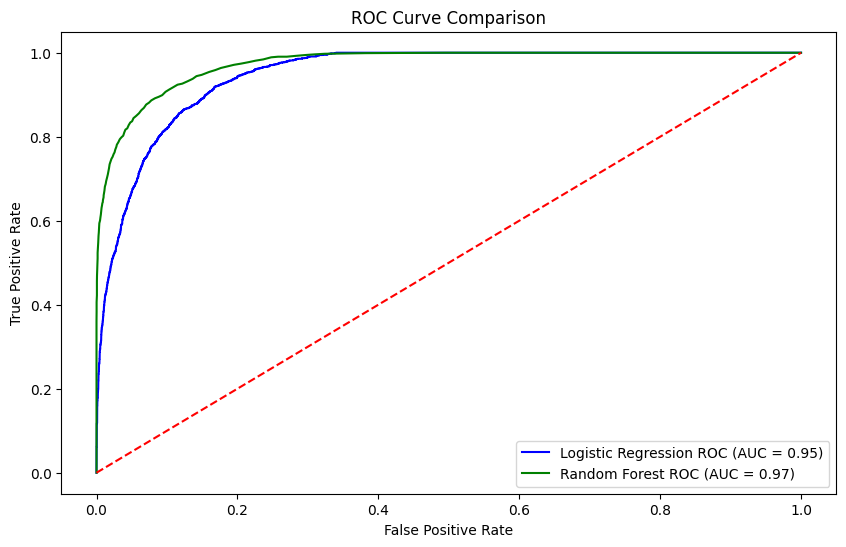

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, color='blue', label=f'Logistic Regression ROC (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', label=f'Random Forest ROC (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

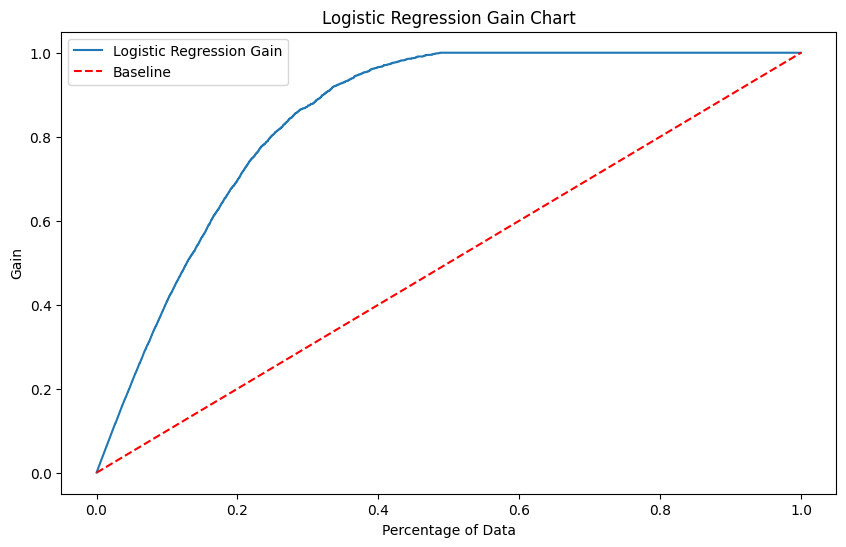

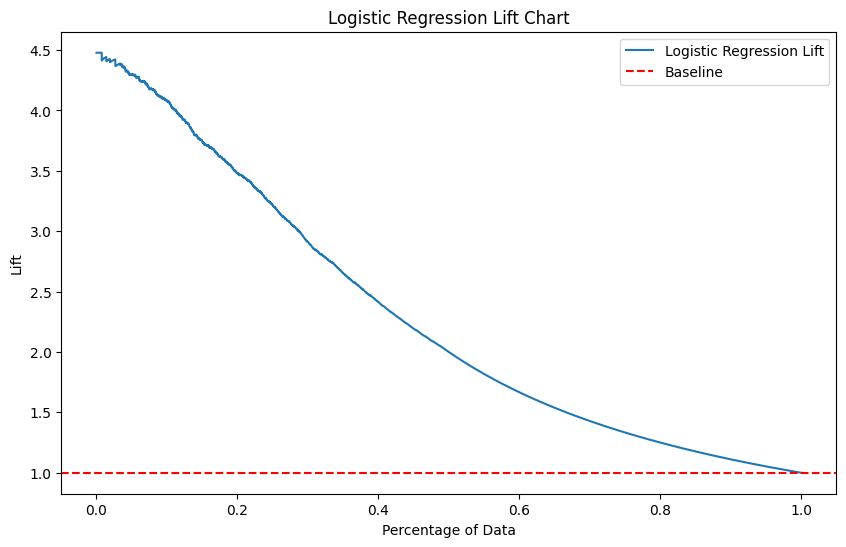

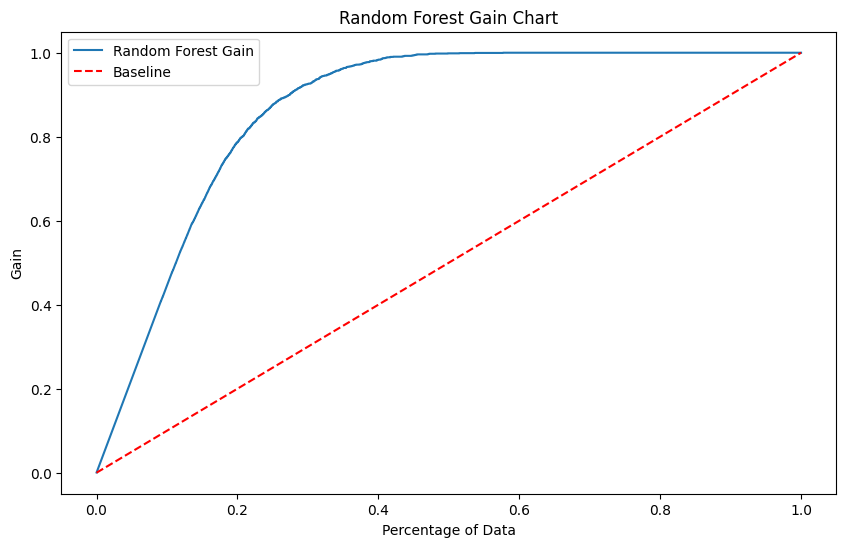

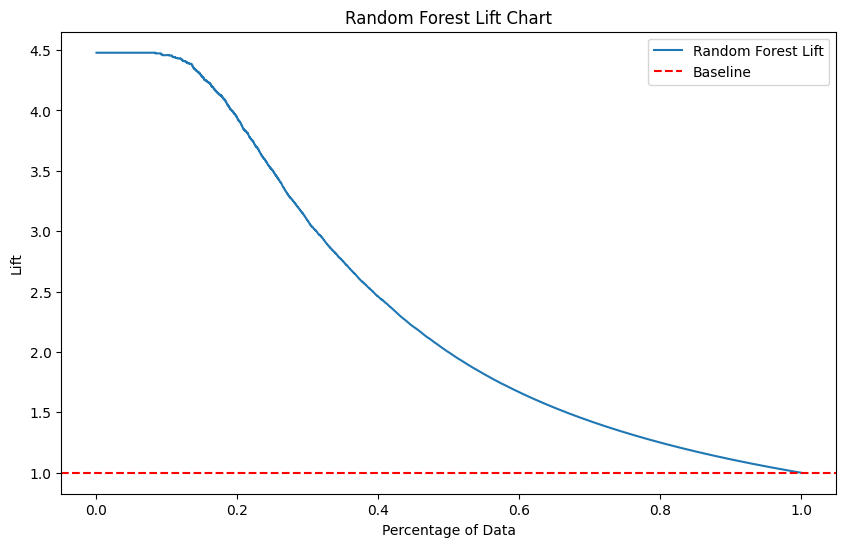

In [ ]:
# Predictions for Logistic Regression
probs_log = log_model.predict_proba(X_test)[:, 1]

# Predictions for Random Forest
probs_rf = rf_model.predict_proba(X_test)[:, 1]

# Lift and Gain Charts Function
def plot_lift_and_gain(y_true, probs, model_name):
    df = pd.DataFrame({'actual': y_true, 'predicted_prob': probs})
    df.sort_values(by='predicted_prob', ascending=False, inplace=True)

    # Cumulative Gains
    df['cumulative_actual'] = df['actual'].cumsum()
    df['cumulative_total'] = range(1, len(df) + 1)
    df['gain'] = df['cumulative_actual'] / df['actual'].sum()
    df['lift'] = df['gain'] / (df['cumulative_total'] / len(df))

    # Plot Gain Chart
    plt.figure(figsize=(10, 6))
    plt.plot(df['cumulative_total'] / len(df), df['gain'], label=f'{model_name} Gain')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Baseline')
    plt.title(f'{model_name} Gain Chart')
    plt.xlabel('Percentage of Data')
    plt.ylabel('Gain')
    plt.legend()
    plt.show()

    # Plot Lift Chart
    plt.figure(figsize=(10, 6))
    plt.plot(df['cumulative_total'] / len(df), df['lift'], label=f'{model_name} Lift')
    plt.axhline(y=1, color='red', linestyle='--', label='Baseline')
    plt.title(f'{model_name} Lift Chart')
    plt.xlabel('Percentage of Data')
    plt.ylabel('Lift')
    plt.legend()
    plt.show()

# Generate Lift and Gain Charts
plot_lift_and_gain(y_test, probs_log, "Logistic Regression")
plot_lift_and_gain(y_test, probs_rf, "Random Forest")

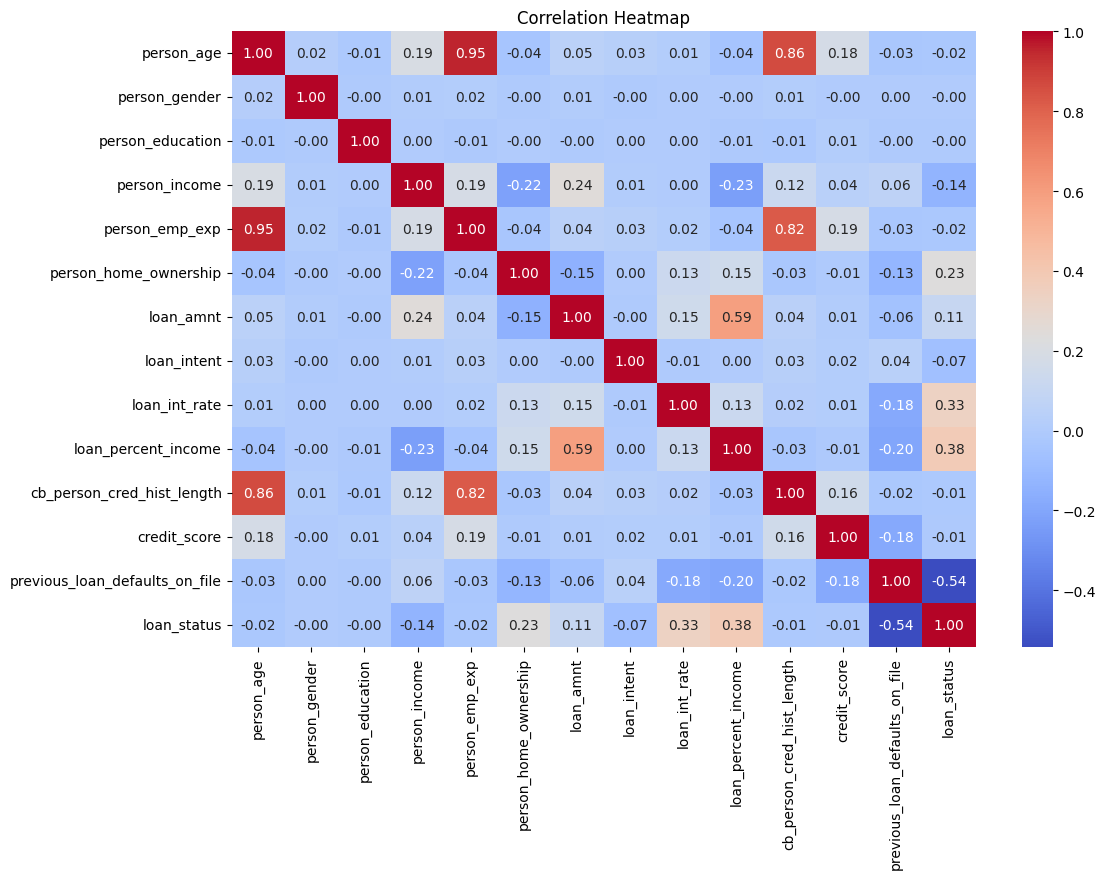

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-12-d543d5ed4b7c>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = risk_df.groupby('risk_bin')['actual'].mean()
<ipython-input-12-d543d5ed4b7c>:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_df.groupby('risk_bin')['net_profit'].mean().plot(kind='bar', color=['green', 'yellow', 'orange', 'red'])


Default Rates by Risk Bin:
risk_bin
Low          0.000000
Medium       0.000000
High         0.175111
Very High    0.718222
Name: actual, dtype: float64
Total Expected Loss: $206.61
Total Net Profit: $-194.60


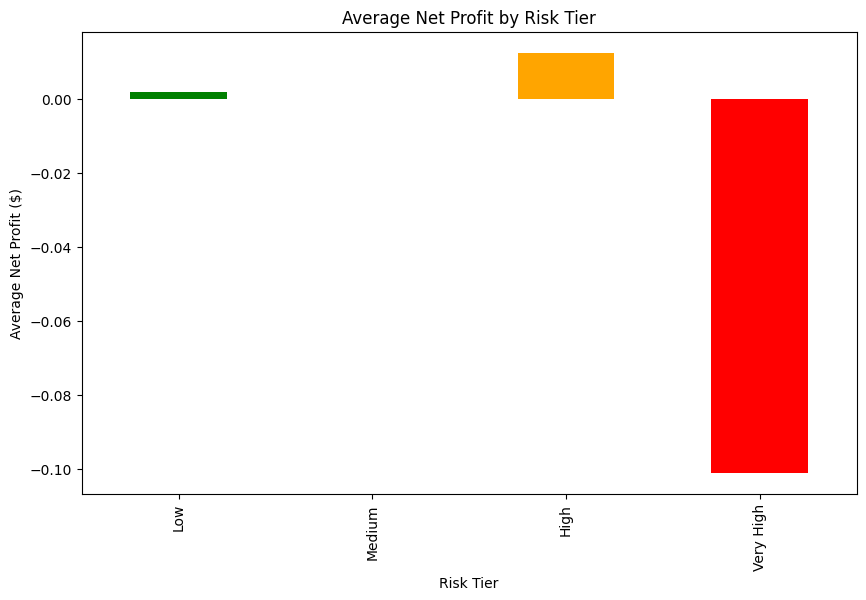

In [ ]:
# Predictions for Logistic Regression
probs_log = log_model.predict_proba(X_test)[:, 1]

# Risk Assessment
risk_bins = pd.qcut(probs_log, q=4, labels=['Low', 'Medium', 'High', 'Very High'])
risk_df = pd.DataFrame({
    'actual': y_test,
    'predicted_prob': probs_log,
    'risk_bin': risk_bins
})

# Calculate default rates per bin
default_rates = risk_df.groupby('risk_bin')['actual'].mean()
print("Default Rates by Risk Bin:")
print(default_rates)

# Expected Loss Calculation
LGD = 0.5  # Assumption: Loss Given Default is 50% of loan amount
risk_df['EAD'] = X_test[:, X.columns.get_loc('loan_amnt')]  # Exposure at Default from loan amounts
risk_df['expected_loss'] = risk_df['predicted_prob'] * LGD * risk_df['EAD']

# Aggregate Expected Loss
total_loss = risk_df['expected_loss'].sum()
print(f"Total Expected Loss: ${total_loss:,.2f}")

# Profitability Analysis
interest_rate_col = X.columns.get_loc('loan_int_rate')
risk_df['interest_revenue'] = risk_df['EAD'] * (X_test[:, interest_rate_col] / 100)
risk_df['net_profit'] = risk_df['interest_revenue'] - risk_df['expected_loss']

# Aggregate Profitability
total_profit = risk_df['net_profit'].sum()
print(f"Total Net Profit: ${total_profit:,.2f}")

# Visualizing Risk Tiers and Profitability
plt.figure(figsize=(10, 6))
risk_df.groupby('risk_bin')['net_profit'].mean().plot(kind='bar', color=['green', 'yellow', 'orange', 'red'])
plt.title('Average Net Profit by Risk Tier')
plt.xlabel('Risk Tier')
plt.ylabel('Average Net Profit ($)')
plt.show()

Sensitivity Analysis Results:
   LGD  Interest Rate  Total Profit
0  0.4             10   -164.506331
1  0.4             15   -164.114332
2  0.4             20   -163.722334
3  0.5             10   -205.828913
4  0.5             15   -205.436915
5  0.5             20   -205.044916
6  0.6             10   -247.151495
7  0.6             15   -246.759497
8  0.6             20   -246.367498
Scenario Modeling Results:
     Scenario  Total Profit
0   Best Case   -147.193301
1  Worst Case   -266.202337
2    Baseline   -266.202337


<ipython-input-13-fb28c25e7070>:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_df.groupby('risk_bin')['net_profit'].mean().plot(kind='bar', color=['green', 'yellow', 'orange', 'red'])


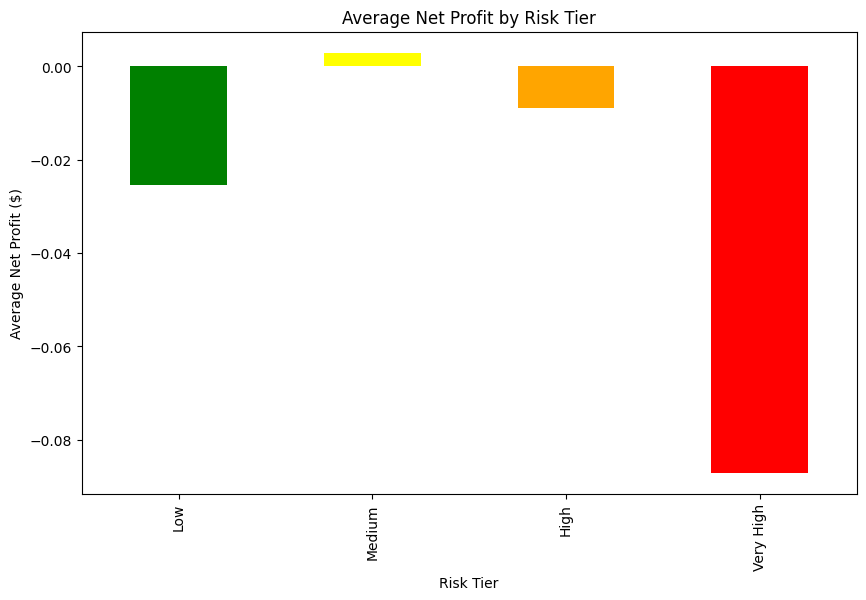

In [ ]:
# Sensitivity Analysis
def sensitivity_analysis(lgd_values, interest_rates):
    results = []
    for lgd in lgd_values:
        for interest in interest_rates:
            risk_df['expected_loss'] = risk_df['predicted_prob'] * lgd * risk_df['EAD']
            risk_df['interest_revenue'] = risk_df['EAD'] * (interest / 100)
            risk_df['net_profit'] = risk_df['interest_revenue'] - risk_df['expected_loss']
            total_profit = risk_df['net_profit'].sum()
            results.append((lgd, interest, total_profit))
    return pd.DataFrame(results, columns=['LGD', 'Interest Rate', 'Total Profit'])

lgd_values = [0.4, 0.5, 0.6]
interest_rates = [10, 15, 20]
sensitivity_results = sensitivity_analysis(lgd_values, interest_rates)
print("Sensitivity Analysis Results:")
print(sensitivity_results)

# Scenario Modeling
def scenario_modeling(scenarios):
    results = []
    for scenario, changes in scenarios.items():
        risk_df['EAD'] = risk_df['EAD'] * changes.get('ead_multiplier', 1)
        risk_df['predicted_prob'] = risk_df['predicted_prob'] * changes.get('pd_multiplier', 1)
        risk_df['expected_loss'] = risk_df['predicted_prob'] * LGD * risk_df['EAD']
        risk_df['net_profit'] = risk_df['interest_revenue'] - risk_df['expected_loss']
        total_profit = risk_df['net_profit'].sum()
        results.append((scenario, total_profit))
    return pd.DataFrame(results, columns=['Scenario', 'Total Profit'])

scenarios = {
    'Best Case': {'ead_multiplier': 0.9, 'pd_multiplier': 0.8},
    'Worst Case': {'ead_multiplier': 1.2, 'pd_multiplier': 1.5},
    'Baseline': {}
}
scenario_results = scenario_modeling(scenarios)
print("Scenario Modeling Results:")
print(scenario_results)

# Visualizing Risk Tiers and Profitability
plt.figure(figsize=(10, 6))
risk_df.groupby('risk_bin')['net_profit'].mean().plot(kind='bar', color=['green', 'yellow', 'orange', 'red'])
plt.title('Average Net Profit by Risk Tier')
plt.xlabel('Risk Tier')
plt.ylabel('Average Net Profit ($)')
plt.show()


<ipython-input-14-1661a4f0c3a0>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for tier, group in risk_df.groupby('risk_bin'):
<ipython-input-14-1661a4f0c3a0>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  portfolio_metrics = risk_df.groupby('risk_bin').agg(


Break-even Interest Rates by Risk Tier:
   Risk Tier  Break-even Interest Rate (%)
0        Low                      0.000828
1     Medium                      0.058379
2       High                     11.485802
3  Very High                     53.269428
Portfolio Metrics by Risk Tier:
    risk_bin  total_loans  total_exposure  avg_net_profit
0        Low         2250     -309.247873       -0.025451
1     Medium         2250       36.222269        0.002972
2       High         2250     -281.933768       -0.008812
3  Very High         2250      563.426545       -0.087020


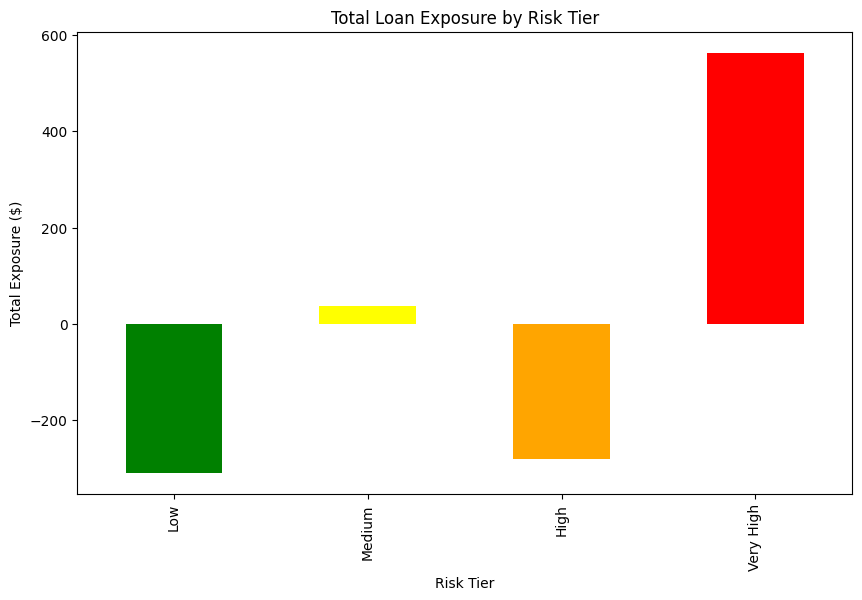

<ipython-input-14-1661a4f0c3a0>:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rorac_results = risk_df.groupby('risk_bin')['rorac'].mean().reset_index()
<ipython-input-14-1661a4f0c3a0>:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_df.groupby('risk_bin')['net_profit'].mean().plot(kind='bar', color=['green', 'yellow', 'orange', 'red'])


RORAC by Risk Tier:
    risk_bin          rorac
0        Low  167488.056876
1     Medium   16938.908842
2       High      68.064588
3  Very High      -2.688378


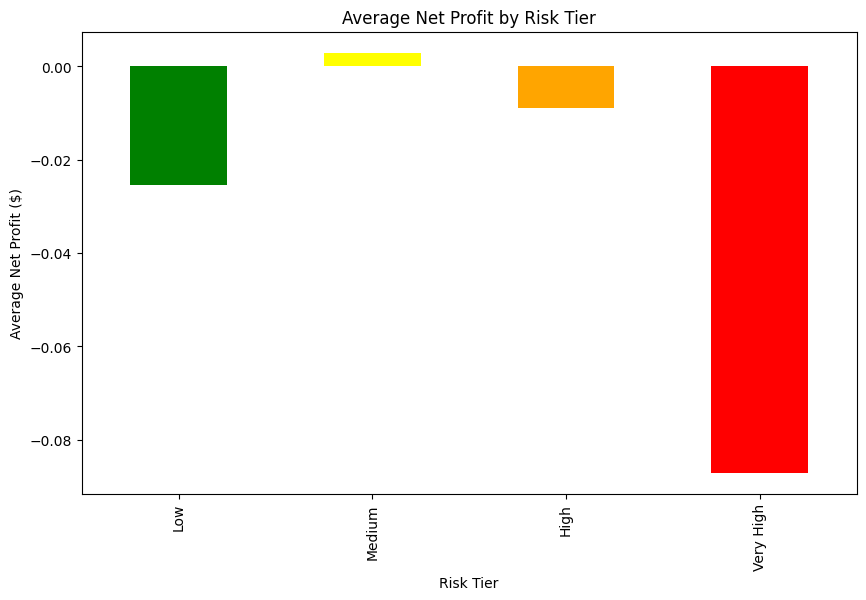

In [ ]:
# Break-even Analysis
def calculate_break_even_rates():
    break_even_rates = []
    for tier, group in risk_df.groupby('risk_bin'):
        total_ead = group['EAD'].sum()
        total_expected_loss = group['expected_loss'].sum()
        break_even_rate = (total_expected_loss / total_ead) * 100
        break_even_rates.append((tier, break_even_rate))
    return pd.DataFrame(break_even_rates, columns=['Risk Tier', 'Break-even Interest Rate (%)'])

break_even_results = calculate_break_even_rates()
print("Break-even Interest Rates by Risk Tier:")
print(break_even_results)

# Portfolio Diversification Metrics
def portfolio_analysis():
    portfolio_metrics = risk_df.groupby('risk_bin').agg(
        total_loans=('EAD', 'count'),
        total_exposure=('EAD', 'sum'),
        avg_net_profit=('net_profit', 'mean')
    ).reset_index()
    return portfolio_metrics

portfolio_metrics = portfolio_analysis()
print("Portfolio Metrics by Risk Tier:")
print(portfolio_metrics)

# Visualizing Portfolio Distribution
plt.figure(figsize=(10, 6))
portfolio_metrics.set_index('risk_bin')['total_exposure'].plot(kind='bar', color=['green', 'yellow', 'orange', 'red'])
plt.title('Total Loan Exposure by Risk Tier')
plt.xlabel('Risk Tier')
plt.ylabel('Total Exposure ($)')
plt.show()

# Return on Risk-Adjusted Capital (RORAC)
def calculate_rorac(capital_allocations):
    risk_df['capital_allocated'] = risk_df['EAD'] * risk_df['predicted_prob'] * capital_allocations
    risk_df['rorac'] = risk_df['net_profit'] / risk_df['capital_allocated']
    rorac_results = risk_df.groupby('risk_bin')['rorac'].mean().reset_index()
    return rorac_results

capital_allocation = 0.1  # Assume 10% capital allocation
rorac_results = calculate_rorac(capital_allocation)
print("RORAC by Risk Tier:")
print(rorac_results)

# Visualizing Risk Tiers and Profitability
plt.figure(figsize=(10, 6))
risk_df.groupby('risk_bin')['net_profit'].mean().plot(kind='bar', color=['green', 'yellow', 'orange', 'red'])
plt.title('Average Net Profit by Risk Tier')
plt.xlabel('Risk Tier')
plt.ylabel('Average Net Profit ($)')
plt.show()


In [ ]:
def calculate_npv(row, discount_rate):
    npv = -row['EAD']  # Initial outflow
    for i in range(1, int(row['loan_term']) + 1):
        npv += row['interest_revenue'] / (1 + discount_rate)**i
    return npv

# Function to calculate IRR (modified to use existing variables)
def calculate_irr(row):
    cashflows = [-row['EAD']] + [row['interest_revenue']] * int(row['loan_term'])
    try:
        irr = np.irr(cashflows)
    except ValueError:
        irr = np.nan  # Handle cases where IRR cannot be calculated
    return irr

# ... (Existing code for risk assessment, expected loss calculation, and profitability analysis) ...

# Calculate NPV and IRR for each loan (using existing variables)
discount_rate = 0.1  # Assume a discount rate of 10%

risk_df['npv'] = risk_df.apply(lambda row: calculate_npv(row, discount_rate), axis=1)
risk_df['irr'] = risk_df.apply(calculate_irr, axis=1)

# Aggregate NPV and IRR by risk bin
npv_by_bin = risk_df.groupby('risk_bin')['npv'].sum()
irr_by_bin = risk_df.groupby('risk_bin')['irr'].mean()

print("NPV by Risk Bin:")
print(npv_by_bin)

print("IRR by Risk Bin:")
print(irr_by_bin)


KeyError: 'loan_term'